In [106]:
import requests
# from bs4 import BeautifulSoup as bs
import pandas as pd
import urllib.request
from urllib.request import urlopen
import seaborn as sns
import folium

In [161]:
data = pd.read_csv('/Users/anielkaaslan/Documents/data-labs/module-2/pythons.csv')


In [162]:
data.head(5)

,objectid,Reporter,ComName,SciName,OccStatus,ObsDate,DateAcc,DateEnt,DateUp,Location,...,IDCred,Verified,Reviewer,ReviewDate,OrgSrcID,PID,Voucher,Museum,MuseumRec,Reference
0,8303498,Travis Mangione FWC,Burmese python,Python molurus ssp. bivittatus,Positive,24 Nov 2019,NaN,26 Nov 2019,NaN,"Miami-Dade, Florida, United States",...,Credible,Verified,FWCC Exotic Species Database,05 Dec 2019,NaN,NaN,0.0,NaN,NaN,NaN
1,8303147,Edward F. Metzger III,Burmese python,Python molurus ssp. bivittatus,Positive,20 Nov 2019,NaN,22 Nov 2019,22 Nov 2019,"Broward, Florida, United States",...,Verified,Verified,FWCC Exotic Species Database,05 Dec 2019,NaN,NaN,NaN,NaN,NaN,NaN
2,8298008,Michael Reupert NPS Big Cypress National Pres...,Burmese python,Python molurus ssp. bivittatus,Positive,07 Nov 2019,NaN,12 Nov 2019,NaN,"Collier, Florida, United States",...,Credible,Verified,FWCC Exotic Species Database,14 Nov 2019,NaN,NaN,0.0,HQ freezer ...,NaN,NaN
3,8295649,"matthew mccollister National Park Service, Big...",Burmese python,Python molurus ssp. bivittatus,Positive,06 Nov 2019,NaN,07 Nov 2019,NaN,"Collier, Florida, United States",...,Credible,Verified,FWCC Exotic Species Database,08 Nov 2019,NaN,NaN,0.0,NaN,NaN,NaN
4,8295647,"matthew mccollister National Park Service, Big...",Burmese python,Python molurus ssp. bivittatus,Positive,05 Nov 2019,NaN,07 Nov 2019,NaN,"Collier, Florida, United States",...,Credible,Verified,FWCC Exotic Species Database,08 Nov 2019,NaN,NaN,0.0,NaN,NaN,NaN


In [109]:
data.columns

data.isnull().sum()

objectid         0
Reporter         0
ComName          0
SciName          0
OccStatus        0
ObsDate          0
DateAcc       4793
DateEnt          0
DateUp        3614
Location         0
Latitude         0
Longitude        0
Datum            0
CoordAcc      4506
Method        2695
DataType      2479
LocalOwner    4763
Habitat       4236
Locality      2296
Site          4797
InfestAcre    4681
GrossAcre     4760
Abundance     4798
Density       4798
NumCollect    1401
Percentcov    4797
TreatArea     4798
TreatComm     4798
Quantity      4687
QuantityU     4687
TrapType      4798
NumTraps      4798
Comments      2211
VisitType     2711
CollectTme    4570
Surveyor      3246
RecSource     4798
RecOwner         0
RecSrcTyp        0
OrigName      2510
Nativity         0
Host          4798
Host_Name     4798
VerifyMthd      70
IDCred           4
Verified         0
Reviewer      3922
ReviewDate    3922
OrgSrcID      4798
PID           4798
Voucher       4313
Museum        2684
MuseumRec   

In [110]:
#Drop unnecessary columns
data = data.drop(['CoordAcc','OrigName', 'Method', 'DataType', 'LocalOwner', 'Habitat', 'Locality', 'Site', 'InfestAcre', 'GrossAcre', 'Abundance', 'Density', 'NumCollect', 'Percentcov', 'TreatArea', 'TreatComm', 'Quantity', 'QuantityU', 'TrapType', 'NumTraps', 'Comments', 'VisitType','CollectTme', 'Surveyor', 'RecSource'], axis=1) 
data = data.drop(['DateAcc', 'DateUp', 'Host', 'Host_Name', 'Reviewer', 'ReviewDate', 'OrgSrcID' , 'PID' , 'Voucher' , 'Museum' , 'MuseumRec', 'Reference'], axis=1) 

In [200]:
sight = data.groupby(['Latitude','Longitude']).count().reset_index()
map1 = folium.Map(
    location=[43.12627,-77.53985],
    tiles='cartodbpositron',
    zoom_start=2,
)
sight.apply(lambda row:folium.CircleMarker(location=[row["Latitude"], row["Longitude"]]).add_to(map1), axis=1)
map1

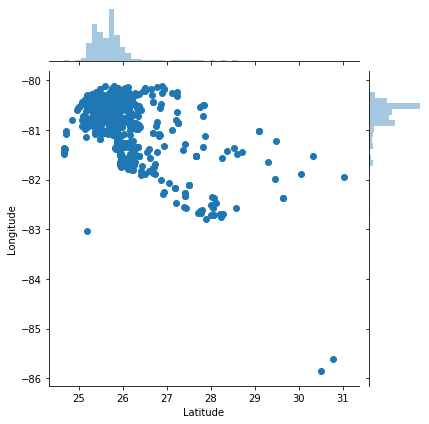

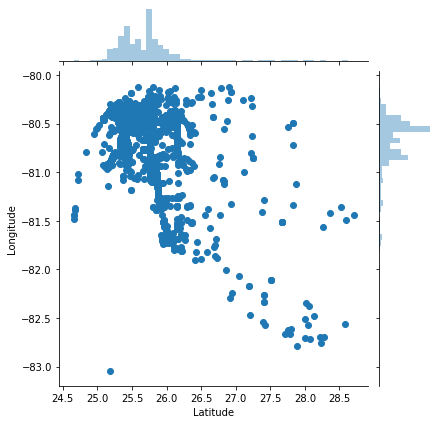

In [207]:

coordinates = pd.DataFrame(data[['Latitude', 'Longitude']])

values = pd.DataFrame(coordinates.loc[(coordinates['Latitude'] < 32.5) & (coordinates['Longitude'] < -50)])  #coordinates.loc[coordinates['Longitude'] < -50]

sns.jointplot(x="Latitude", y="Longitude", data=values);

closest = pd.DataFrame(coordinates.loc[(coordinates['Latitude'] < 29) & (coordinates['Longitude'] < -80)])

sns.jointplot(x="Latitude", y="Longitude", data=closest);

In [60]:
data = pd.read_csv('/Users/anielkaaslan/Documents/data-labs/module-2/pythons.csv')

# data = data.drop(['CoordAcc', 'Method', 'DataType', 'LocalOwner', 'Habitat', 'Locality', 'Site', 'InfestAcre', 'GrossAcre', 'Abundance', 'Density', 'NumCollect', 'Percentcov', 'TreatArea', 'TreatComm', 'Quantity', 'QuantityU', 'TrapType', 'NumTraps', 'Comments', 'VisitType','CollectTme', 'Surveyor', 'RecSource'], axis=1) 
# data = data.drop(['DateAcc', 'DateUp', 'Host', 'Host_Name', 'Reviewer', 'ReviewDate', 'OrgSrcID' , 'PID' , 'Voucher' , 'Museum' , 'MuseumRec', 'Reference'], axis=1) 

# data['ObsDate'].unique()

# data.head()

array(['24 Nov 2019', '20 Nov 2019', '07 Nov 2019', ..., '11 Jul 2007',
       '27 Mar 2009', '27 Dec 2008'], dtype=object)

In [112]:
data['ObsDate'] = pd.to_datetime(data['ObsDate'])
data.head()

,objectid,Reporter,ComName,SciName,OccStatus,ObsDate,DateEnt,Location,Latitude,Longitude,Datum,RecOwner,RecSrcTyp,Nativity,VerifyMthd,IDCred,Verified
0,8303498,Travis Mangione FWC,Burmese python,Python molurus ssp. bivittatus,Positive,2019-11-24,26 Nov 2019,"Miami-Dade, Florida, United States",25.76191,-80.74829,WGS84,Unknown,Web Report,Introduced,Reporter Expertise,Credible,Verified
1,8303147,Edward F. Metzger III,Burmese python,Python molurus ssp. bivittatus,Positive,2019-11-20,22 Nov 2019,"Broward, Florida, United States",26.29298,-80.50567,WGS84,Unknown,Android,Introduced,Photographs,Verified,Verified
2,8298008,Michael Reupert NPS Big Cypress National Pres...,Burmese python,Python molurus ssp. bivittatus,Positive,2019-11-07,12 Nov 2019,"Collier, Florida, United States",25.86434,-81.10691,WGS84,Unknown,Web Report,Introduced,Reporter Expertise,Credible,Verified
3,8295649,"matthew mccollister National Park Service, Big...",Burmese python,Python molurus ssp. bivittatus,Positive,2019-11-06,07 Nov 2019,"Collier, Florida, United States",25.83131,-80.90326,WGS84,Unknown,Web Report,Introduced,Reporter Expertise,Credible,Verified
4,8295647,"matthew mccollister National Park Service, Big...",Burmese python,Python molurus ssp. bivittatus,Positive,2019-11-05,07 Nov 2019,"Collier, Florida, United States",25.87197,-81.18223,WGS84,Unknown,Web Report,Introduced,Reporter Expertise,Credible,Verified


In [132]:
# data['ObsDate'].min()


# (data['ObsDate']=='2008-01-18').value_counts()

# data['count'] = pd.DataFrame(data[data['ObsDate'].count()])

False    4797
True        1
Name: ObsDate, dtype: int64

In [99]:
# data.ObsDate = pd.to_datetime(data.ObsDate)

data['OrigName'].unique()#.isnull().sum()
# furniture = data.loc[data['ObsDate'].unique()]
# data['date'] = pd.date_range(start = '01/01/2019', end = '07/30/2019', periods = 4798)
# data.index = pd.to_datetime(data['date'])

# data.drop(columns = 'date', inplace = True)


# data.index


# data['date'] = pd.date_range(start = '1/1/2019', periods = 4798, freq='H')
# # data.shape
# data.head()

array([nan, 'Python molurus bivittatus', 'ball python (Python regius)',
       'common boa (Boa constrictor)', 'pythons (Python spp.)',
       'Python molurus ssp. Bivittatus', 'Burmese python',
       'Tupinambis merianae'], dtype=object)

In [89]:
data['Month'] = data['ObsDate'].dt.month
data['Year'] = data['ObsDate'].dt.year
data['Month-str'] = data['ObsDate'].dt.strftime('%b')   

sights = 

groupby('Order Date')['Sales'].sum().reset_index()
sights = data.groupby('Year').count().reset_index()
sights
# data.groupby('ObsDate').count()

,Year,objectid,Reporter,ComName,SciName,OccStatus,ObsDate,DateEnt,Location,Latitude,...,Datum,RecOwner,RecSrcTyp,OrigName,Nativity,VerifyMthd,IDCred,Verified,Month,Month-str
0,1979,1,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1
1,1995,1,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1
2,1996,2,2,2,2,2,2,2,2,2,...,2,2,2,0,2,2,2,2,2,2
3,1997,4,4,4,4,4,4,4,4,4,...,4,4,4,2,4,4,4,4,4,4
4,1998,2,2,2,2,2,2,2,2,2,...,2,2,2,0,2,2,2,2,2,2
5,1999,3,3,3,3,3,3,3,3,3,...,3,3,3,0,3,3,3,3,3,3
6,2000,4,4,4,4,4,4,4,4,4,...,4,4,4,1,4,4,4,4,4,4
7,2001,9,9,9,9,9,9,9,9,9,...,9,9,9,0,9,9,9,9,9,9
8,2002,30,30,30,30,30,30,30,30,30,...,30,30,30,2,30,30,30,30,30,30
9,2003,52,52,52,52,52,52,52,52,52,...,52,52,52,3,52,52,52,52,52,52


In [90]:
# sights = data.set_index(data['ObsDate'])
sights.index = data.index
sights.index


ValueError: Length mismatch: Expected axis has 26 elements, new values have 4798 elements

In [87]:
data.resample('D').count()

,objectid,Reporter,ComName,SciName,OccStatus,ObsDate,DateEnt,Location,Latitude,Longitude,...,RecOwner,RecSrcTyp,OrigName,Nativity,VerifyMthd,IDCred,Verified,Month,Year,Month-str
date,,,,,,,,,,,,,,,,,,,,,
1979-10-24,1,1,1,1,1,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,1
1979-10-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1979-10-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1979-10-27,1,1,1,1,1,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,1
1979-10-28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1979-10-29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1979-10-30,1,1,1,1,1,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,1
1979-10-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1979-11-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
y = data['Sales'].resample('MS').mean()
data.head(10)

,objectid,Reporter,ComName,SciName,OccStatus,ObsDate,DateEnt,Location,Latitude,Longitude,...,RecSrcTyp,OrigName,Nativity,VerifyMthd,IDCred,Verified,Month,Year,Month-str,rolling_sum
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,8303498,Travis Mangione FWC,Burmese python,Python molurus ssp. bivittatus,Positive,2019-11-24,26 Nov 2019,"Miami-Dade, Florida, United States",25.76191,-80.74829,...,Web Report,NaN,Introduced,Reporter Expertise,Credible,Verified,11,2019,Nov,NaN
2019-01-01 01:00:00,8303147,Edward F. Metzger III,Burmese python,Python molurus ssp. bivittatus,Positive,2019-11-20,22 Nov 2019,"Broward, Florida, United States",26.29298,-80.50567,...,Android,NaN,Introduced,Photographs,Verified,Verified,11,2019,Nov,NaN
2019-01-01 02:00:00,8298008,Michael Reupert NPS Big Cypress National Pres...,Burmese python,Python molurus ssp. bivittatus,Positive,2019-11-07,12 Nov 2019,"Collier, Florida, United States",25.86434,-81.10691,...,Web Report,NaN,Introduced,Reporter Expertise,Credible,Verified,11,2019,Nov,33.0
2019-01-01 03:00:00,8295649,"matthew mccollister National Park Service, Big...",Burmese python,Python molurus ssp. bivittatus,Positive,2019-11-06,07 Nov 2019,"Collier, Florida, United States",25.83131,-80.90326,...,Web Report,NaN,Introduced,Reporter Expertise,Credible,Verified,11,2019,Nov,33.0
2019-01-01 04:00:00,8295647,"matthew mccollister National Park Service, Big...",Burmese python,Python molurus ssp. bivittatus,Positive,2019-11-05,07 Nov 2019,"Collier, Florida, United States",25.87197,-81.18223,...,Web Report,NaN,Introduced,Reporter Expertise,Credible,Verified,11,2019,Nov,33.0
2019-01-01 05:00:00,8295635,Jeffrey Fobb Miami-Dade Fire Rescue,Burmese python,Python molurus ssp. bivittatus,Positive,2019-11-07,07 Nov 2019,"Miami-Dade, Florida, United States",25.82564,-80.35441,...,iPhone,NaN,Introduced,Photographs,Verified,Verified,11,2019,Nov,33.0
2019-01-01 06:00:00,8295629,"matthew mccollister National Park Service, Big...",Burmese python,Python molurus ssp. bivittatus,Positive,2019-11-05,07 Nov 2019,"Collier, Florida, United States",25.90160,-81.29282,...,Web Report,NaN,Introduced,Reporter Expertise,Credible,Verified,11,2019,Nov,33.0
2019-01-01 07:00:00,8295159,Joshua Sands,Burmese python,Python molurus ssp. bivittatus,Positive,2019-11-04,04 Nov 2019,"Monroe, Florida, United States",25.22318,-80.43027,...,Web Report,NaN,Introduced,Photographs,Verified,Verified,11,2019,Nov,33.0
2019-01-01 08:00:00,8295155,Matthew Bowser,Burmese python,Python molurus ssp. bivittatus,Positive,2019-10-31,04 Nov 2019,"Collier, Florida, United States",25.84801,-80.94631,...,Web Report,NaN,Introduced,Reporter Expertise,Credible,Verified,10,2019,Oct,32.0


In [44]:
data['rolling_sum_backfilled'] = data['rolling_sum'].fillna(method='backfill')
data.head(10)

,objectid,Reporter,ComName,SciName,OccStatus,ObsDate,DateEnt,Location,Latitude,Longitude,...,OrigName,Nativity,VerifyMthd,IDCred,Verified,Month,Year,Month-str,rolling_sum,rolling_sum_backfilled
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,8303498,Travis Mangione FWC,Burmese python,Python molurus ssp. bivittatus,Positive,2019-11-24,26 Nov 2019,"Miami-Dade, Florida, United States",25.76191,-80.74829,...,NaN,Introduced,Reporter Expertise,Credible,Verified,11,2019,Nov,NaN,33.0
2019-01-01 01:00:00,8303147,Edward F. Metzger III,Burmese python,Python molurus ssp. bivittatus,Positive,2019-11-20,22 Nov 2019,"Broward, Florida, United States",26.29298,-80.50567,...,NaN,Introduced,Photographs,Verified,Verified,11,2019,Nov,NaN,33.0
2019-01-01 02:00:00,8298008,Michael Reupert NPS Big Cypress National Pres...,Burmese python,Python molurus ssp. bivittatus,Positive,2019-11-07,12 Nov 2019,"Collier, Florida, United States",25.86434,-81.10691,...,NaN,Introduced,Reporter Expertise,Credible,Verified,11,2019,Nov,33.0,33.0
2019-01-01 03:00:00,8295649,"matthew mccollister National Park Service, Big...",Burmese python,Python molurus ssp. bivittatus,Positive,2019-11-06,07 Nov 2019,"Collier, Florida, United States",25.83131,-80.90326,...,NaN,Introduced,Reporter Expertise,Credible,Verified,11,2019,Nov,33.0,33.0
2019-01-01 04:00:00,8295647,"matthew mccollister National Park Service, Big...",Burmese python,Python molurus ssp. bivittatus,Positive,2019-11-05,07 Nov 2019,"Collier, Florida, United States",25.87197,-81.18223,...,NaN,Introduced,Reporter Expertise,Credible,Verified,11,2019,Nov,33.0,33.0
2019-01-01 05:00:00,8295635,Jeffrey Fobb Miami-Dade Fire Rescue,Burmese python,Python molurus ssp. bivittatus,Positive,2019-11-07,07 Nov 2019,"Miami-Dade, Florida, United States",25.82564,-80.35441,...,NaN,Introduced,Photographs,Verified,Verified,11,2019,Nov,33.0,33.0
2019-01-01 06:00:00,8295629,"matthew mccollister National Park Service, Big...",Burmese python,Python molurus ssp. bivittatus,Positive,2019-11-05,07 Nov 2019,"Collier, Florida, United States",25.90160,-81.29282,...,NaN,Introduced,Reporter Expertise,Credible,Verified,11,2019,Nov,33.0,33.0
2019-01-01 07:00:00,8295159,Joshua Sands,Burmese python,Python molurus ssp. bivittatus,Positive,2019-11-04,04 Nov 2019,"Monroe, Florida, United States",25.22318,-80.43027,...,NaN,Introduced,Photographs,Verified,Verified,11,2019,Nov,33.0,33.0
2019-01-01 08:00:00,8295155,Matthew Bowser,Burmese python,Python molurus ssp. bivittatus,Positive,2019-10-31,04 Nov 2019,"Collier, Florida, United States",25.84801,-80.94631,...,NaN,Introduced,Reporter Expertise,Credible,Verified,10,2019,Oct,32.0,32.0


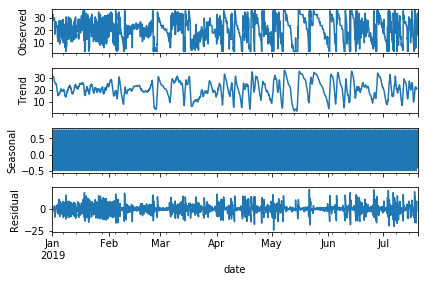

In [48]:
import statsmodels.api as sm

res = sm.tsa.seasonal_decompose(data.rolling_sum_backfilled)
resplot = res.plot()

In [47]:
from statsmodels.tsa.arima_model import ARMA

# train = data['rolling_sum']
# train
test = data['rolling_sum_backfilled']
test
model = ARMA(  #model is a generic formula molded into our data set
    test,
#     freq = 60,
    order = (2,1)  # 1 is the degree of white noise
).fit()


/Users/anielkaaslan/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


In [73]:
from statsmodels.tsa.ar_model import AR

train, test = data.rolling_sum_backfilled[:-10], data.rolling_sum_backfilled[-10:]
model = AR(data.rolling_sum_backfilled)
model_fit = model.fit(maxlag=1)
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

predictions.head()

AttributeError: 'DataFrame' object has no attribute 'rolling_sum_backfilled'